# ABBA BABA test
## Loading modules

In [1]:
import gcsfs #module for google cloud connection
import os
import allel
import zarr
import pandas as pd
import numpy as np
from matplotlib import pyplot

------

### Connect to google cloud ag1000g data 

In [2]:
gcs_orig = gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token='cache')
gcs =  gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token=gcs_orig.session.credentials)

In [3]:
phase2path = os.path.join("ag1000g-release", "phase2.AR1", "variation", "main", "zarr", "biallelic", "ag1000g.phase2.ar1.pass.biallelic")

In [4]:
gcsmap = gcsfs.mapping.GCSMap(phase2path, gcs=gcs)

----------------------------

Load Ag1000G data into python (metadata using pandas and genome using zarr and then scikit-allel)

In [5]:
metadata = pd.read_csv("samples.meta.txt", sep="\t")
metadata.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


Taking 4 populations for the ABBA BABA test and subset

In [6]:
pop_select = metadata.population.isin({'BFcol', 'GHcol', 'BFgam', 'AOcol'}).values
pop_select

array([ True,  True,  True, ..., False, False, False])

In [7]:
pop_subset = metadata[pop_select]
pop_subset.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


In [8]:
calldata= zarr.Group(gcsmap, read_only=True)

In [9]:
g = calldata["2L"]["calldata/GT"]

In [10]:
variants = calldata["2L"]["variants"]

In [11]:
pos_all = allel.VariantChunkedTable(variants, names=['POS'], index = 'POS')
pos_all

,POS
0,25050
1,51212
2,51214
...,...
8906420,49356425
8906421,49356426
8906422,49356429


In [12]:
pos = variants['POS'][:]
pos

array([   25050,    51212,    51214, ..., 49356425, 49356426, 49356429],
      dtype=int32)

In [13]:
geno = allel.GenotypeChunkedArray(g)
geno

<GenotypeChunkedArray shape=(8906423, 1142, 2) dtype=int8 chunks=(524288, 61, 2)
   nbytes=18.9G cbytes=-1 cratio=-20342270132.0
   compression=blosc compression_opts={'cname': 'zstd', 'clevel': 1, 'shuffle': -1, 'blocksize': 0}
   values=zarr.core.Array>

In [1]:
%run "08222019_functions.ipynb"

NameError: name 'gcs_bucket_fs' is not defined

Subset genotype to my 4 populations

In [14]:
geno_subset = geno.subset(sel1=pop_select)
geno_subset

<GenotypeChunkedArray shape=(8906423, 300, 2) dtype=int8 chunks=(4349, 300, 2)
   nbytes=5.0G cbytes=215.8M cratio=23.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [15]:
grp = pop_subset.groupby("population")

In [16]:
grp_indices = grp.indices
grp_indices

{'AOcol': array([222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
        274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]),
 'BFcol': array([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         72,  73,  74,  75,  76,  77,  78,  82,  83,  84,  94,  95,  96,
         97,  98, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 150, 155, 156, 158, 159, 160, 163, 164, 165, 166,
        167, 168, 169, 171, 175, 178, 181, 183, 184, 186, 187, 188, 189,
        190, 196, 197, 200, 201, 204, 205, 213, 216, 219]),
 'BFgam': array([ 55,  69,  70,  71,  79,  80,  81,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  99, 100, 10

In [17]:
ac_subpops = geno_subset.count_alleles_subpops(grp_indices)
ac_subpops

<AlleleCountsChunkedTable shape=(8906423,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('GHcol', '<i4', (2,))]
   nbytes=271.8M cbytes=28.2M cratio=9.6
   values=allel.chunked.storage_zarr.ZarrTable>

In [18]:
abba_2L = allel.patterson_d(ac_subpops['AOcol'], ac_subpops['BFcol'], ac_subpops['BFgam'], ac_subpops['GHcol'])
abba_2L

(array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.00180653]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00180653]))

In [19]:
len(abba_2L[0])

8906423

In [20]:
min(abba_2L[0])

-0.7425318903579773

In [21]:
max(abba_2L[0])

0.943561872909699

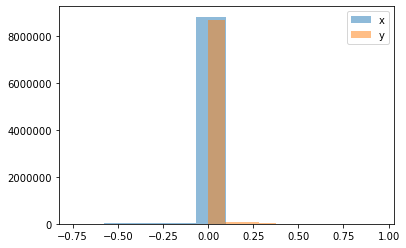

In [22]:
x = abba_2L[0]
y = abba_2L[1]
pyplot.hist(x, alpha=0.5, label='x')
pyplot.hist(y, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [23]:
d_stat_all = abba_2L[0] / abba_2L[1]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [24]:
bool_notna = ~np.isnan(d_stat_all)

In [25]:
dstat_plot = np.compress(bool_notna, d_stat_all)
pos_plot = np.compress(bool_notna, pos)

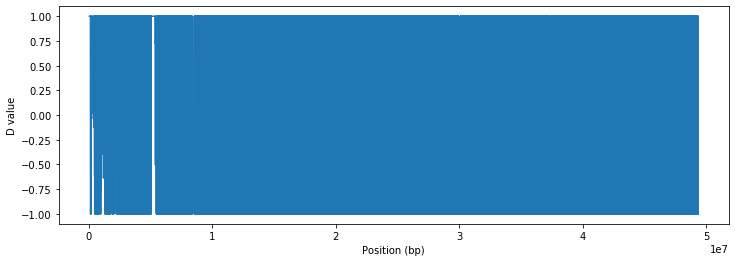

In [26]:
fig, ax = pyplot.subplots(figsize=(12, 4))
ax.plot(pos_plot, dstat_plot)
ax.set_xlabel('Position (bp)')
ax.set_ylabel('D value');

(array([518983.,  98669.,  99672., 106566., 154484., 140630., 107181.,
         69899.,  63619., 407499.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -7.77156117e-15,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

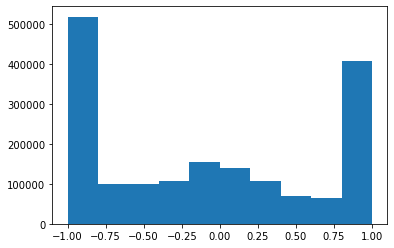

In [27]:
pyplot.hist(dstat_plot)

---------------------------------------------------

In [62]:
abba_2L_bj50kb = allel.average_patterson_d(ac_subpops['BFcol'], ac_subpops['GHcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 500000)
abba_2L_bj50kb

(0.3927818671892285,
 0.08784216310059566,
 4.4714503072905885,
 array([ 0.01576481,  0.0112149 ,  0.01396301, -0.00697923,  0.00621131,
         0.00401581,  0.4398873 ,  0.75492871,  0.68255092,  0.66161197,
         0.61185488,  0.74606056,  0.77090011,  0.80091322,  0.0087393 ,
         0.00158595,  0.00464924]),
 array([0.4271481 , 0.42684661, 0.42532311, 0.42783087, 0.42946351,
        0.42761085, 0.40542237, 0.37541737, 0.38541059, 0.38836776,
        0.3923386 , 0.38316257, 0.37766688, 0.37312099, 0.42497847,
        0.42531332, 0.42791625]))

In [63]:
len(abba_2L_bj50kb[3])

17

In [64]:
metadata.population.value_counts()

CMgam    297
UGgam    112
BFgam     92
GW        91
AOcol     78
BFcol     75
CIcol     71
GAgam     69
GM        65
GHcol     55
KE        48
GNgam     40
FRgam     24
GHgam     12
GQgam      9
GNcol      4
Name: population, dtype: int64

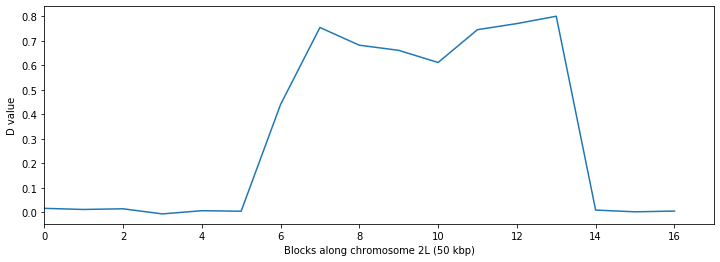

In [65]:
fig, ax = pyplot.subplots(figsize=(12, 4))
ax.plot(abba_2L_bj50kb[3])
ax.set_xlim(0, 17)
ax.set_xlabel('Blocks along chromosome 2L (50 kbp)')
ax.set_ylabel('D value');

----------------------------------------------------------

In [66]:
abba_2L_bj10kb = allel.average_patterson_d(ac_subpops['BFcol'], ac_subpops['GHcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 100000)
abba_2L_bj10kb

(0.3927818671892285,
 0.03968072992989912,
 9.898554484333475,
 array([ 3.54742654e-02, -9.36496678e-03,  1.74096682e-02,  2.26477453e-02,
         1.50518800e-02, -2.92584100e-03,  2.37340025e-02,  1.02196023e-02,
         3.79437841e-03,  1.93993022e-02,  1.86731218e-02,  1.53361292e-02,
         2.92601637e-02,  5.63498296e-04, -1.19827846e-03, -5.83228746e-03,
        -6.90296137e-03, -1.65187305e-02, -2.81743362e-03, -4.30364581e-03,
         5.71934380e-03,  5.28329206e-03,  8.71708041e-03,  1.28260437e-03,
         1.04605540e-02,  4.21257802e-03,  5.55209390e-03,  1.05270978e-02,
        -4.02080561e-03,  3.74859411e-03,  2.63749991e-03,  9.52836548e-03,
         1.61554053e-01,  8.48322232e-01,  8.19864609e-01,  7.56334594e-01,
         7.45475920e-01,  7.49929277e-01,  7.63922989e-01,  7.57176642e-01,
         7.12655293e-01,  6.99749323e-01,  6.54039602e-01,  7.11745251e-01,
         6.36813940e-01,  6.34689299e-01,  7.67474836e-01,  6.91612209e-01,
         6.22898737e-01, 

In [67]:
len(abba_2L_bj10kb[3])

89

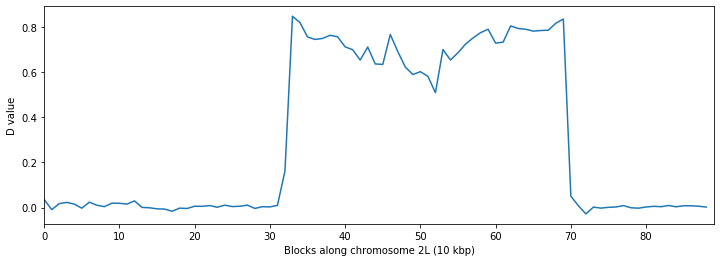

In [68]:
fig, ax = pyplot.subplots(figsize=(12, 4))
ax.plot(abba_2L_bj10kb[3])
ax.set_xlim(0, 89)
ax.set_xlabel('Blocks along chromosome 2L (10 kbp)')
ax.set_ylabel('D value');

In [73]:
89*10000

890000

In [70]:
len(pos)

8906423

In [71]:
17*50000

850000

In [75]:
len(abba_2L_bj1kb[3])

890

In [76]:
890*1000

890000

------------------------------------

ABBABABA Test between BFcol, CIcol, BFgam, AOcol

In [78]:
pop_select = metadata.population.isin({'BFcol', 'CIcol', 'BFgam', 'AOcol'}).values
pop_select

array([False, False, False, ...,  True,  True,  True])

In [79]:
pop_subset = metadata[pop_select]
pop_subset.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
67,AB0085-C,BF2-4,BFgam,Burkina Faso,Pala,Pala,Austin Burt,Sam O'Loughlin,2012,S,F,89905852,28.01,ERS223996,11.150,-4.235
68,AB0087-C,BF3-3,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,116706234,36.76,ERS224013,11.233,-4.472
69,AB0088-C,BF3-5,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,112090460,23.30,ERS223991,11.233,-4.472
70,AB0089-C,BF3-8,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,145350454,41.36,ERS224031,11.233,-4.472
71,AB0090-C,BF3-10,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,105012254,34.64,ERS223936,11.233,-4.472


In [80]:
geno_subset = geno.subset(sel1=pop_select)
geno_subset

<GenotypeChunkedArray shape=(8906423, 316, 2) dtype=int8 chunks=(4349, 316, 2)
   nbytes=5.2G cbytes=228.9M cratio=23.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [81]:
grp = pop_subset.groupby("population")

In [82]:
grp_indices = grp.indices

In [83]:
ac_subpops = geno_subset.count_alleles_subpops(grp_indices)

In [84]:
abba_2L_bj10kb = allel.average_patterson_d(ac_subpops['BFcol'], ac_subpops['CIcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 100000)

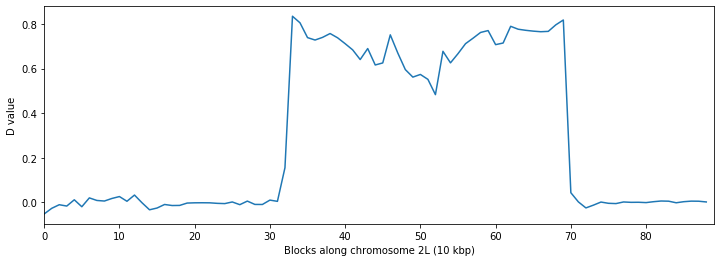

In [85]:
fig, ax = pyplot.subplots(figsize=(12, 4))
ax.plot(abba_2L_bj10kb[3])
ax.set_xlim(0, 89)
ax.set_xlabel('Blocks along chromosome 2L (10 kbp)')
ax.set_ylabel('D value');

----------------------------------------------------------------

ABBABABA Test between BFcol, CIcol, BFgam, AOcol

In [87]:
pop_select = metadata.population.isin({'BFcol', 'GNcol', 'BFgam', 'AOcol'}).values
pop_select

array([False, False, False, ..., False, False, False])

In [88]:
pop_subset = metadata[pop_select]
pop_subset.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
67,AB0085-C,BF2-4,BFgam,Burkina Faso,Pala,Pala,Austin Burt,Sam O'Loughlin,2012,S,F,89905852,28.01,ERS223996,11.150,-4.235
68,AB0087-C,BF3-3,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,116706234,36.76,ERS224013,11.233,-4.472
69,AB0088-C,BF3-5,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,112090460,23.30,ERS223991,11.233,-4.472
70,AB0089-C,BF3-8,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,145350454,41.36,ERS224031,11.233,-4.472
71,AB0090-C,BF3-10,BFcol,Burkina Faso,Bana,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,105012254,34.64,ERS223936,11.233,-4.472


In [89]:
geno_subset = geno.subset(sel1=pop_select)
geno_subset

<GenotypeChunkedArray shape=(8906423, 249, 2) dtype=int8 chunks=(8698, 249, 2)
   nbytes=4.1G cbytes=177.8M cratio=23.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [90]:
grp = pop_subset.groupby("population")

In [91]:
grp_indices = grp.indices

In [92]:
ac_subpops = geno_subset.count_alleles_subpops(grp_indices)

In [93]:
abba_2L_bj10kb = allel.average_patterson_d(ac_subpops['BFcol'], ac_subpops['GNcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 100000)

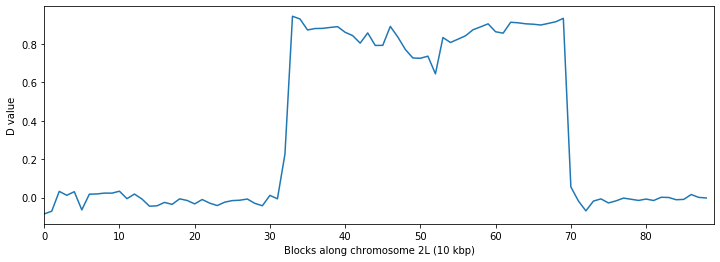

In [94]:
fig, ax = pyplot.subplots(figsize=(12, 4))
ax.plot(abba_2L_bj10kb[3])
ax.set_xlim(0, 89)
ax.set_xlabel('Blocks along chromosome 2L (10 kbp)')
ax.set_ylabel('D value');

----------------------------------

In [128]:
# compute windows with equal numbers of SNPs
pos = variants['POS'][:]
windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=10000)
x = np.asarray(windows).mean(axis=1)

In [129]:
len(x)

890

In [130]:
y1 = allel.average_patterson_d(ac_subpops['BFcol'], ac_subpops['GNcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 10000)

In [131]:
len(y1[3])

890

(0, 49356429)

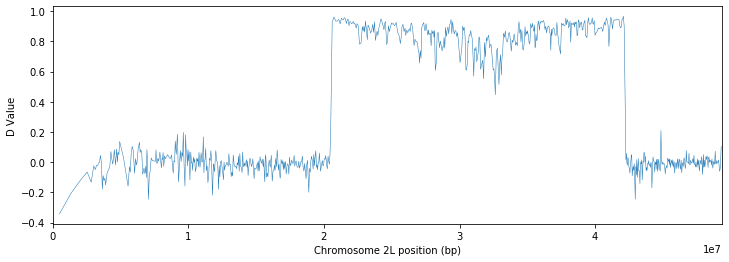

In [134]:
y1 = allel.average_patterson_d(ac_subpops['BFcol'], ac_subpops['GNcol'], ac_subpops['BFgam'], ac_subpops['AOcol'], 10000)
# plot
fig, ax = pyplot.subplots(figsize=(12, 4))
#sns.despine(ax=ax, offset=10)
ax.plot(x, y1[3], lw=.5)
ax.set_ylabel("D Value")
ax.set_xlabel('Chromosome 2L position (bp)')
ax.set_xlim(0, pos.max())